### Modelo Support Vector Machines para predicción de precipitaciones

## por: Luis Carlos Rincón y Jeison Polanco

### En el presente archivo se realizara la implementación del modelo de predicción Support Vector Machines

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [114]:
datos = pd.read_csv('csv_Datos_prediccion_tesis_1.csv')
#datos = datos.astype(float).fillna(0.0)
datos.head()

,T,Po,Pa,U,Ff,N,Nh,VV,Td,tR,RRR
0,12.8,565.7,1.0,93,2,0.75,0.50,18.0,11.7,24,0
1,18.2,564.8,-0.5,57,7,0.60,0.60,18.0,9.5,6,0
2,12.0,565.9,-0.4,91,1,0.75,0.75,12.0,10.6,6,1
3,12.0,565.7,0.9,88,3,0.75,0.25,20.0,10.1,24,0
4,12.5,565.3,0.7,85,4,1.00,0.40,18.0,10.0,24,1


In [115]:
y = datos.RRR
X = datos.drop('RRR', axis = 1)

In [116]:
from sklearn.model_selection import train_test_split

# División de los datos en un 80% para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear').fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7194570135746606


In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Indice de ocurrencia
print(accuracy_score(y_test, y_pred))

[[ 27  55]
 [  7 132]]
              precision    recall  f1-score   support

           0       0.79      0.33      0.47        82
           1       0.71      0.95      0.81       139

    accuracy                           0.72       221
   macro avg       0.75      0.64      0.64       221
weighted avg       0.74      0.72      0.68       221

0.7194570135746606


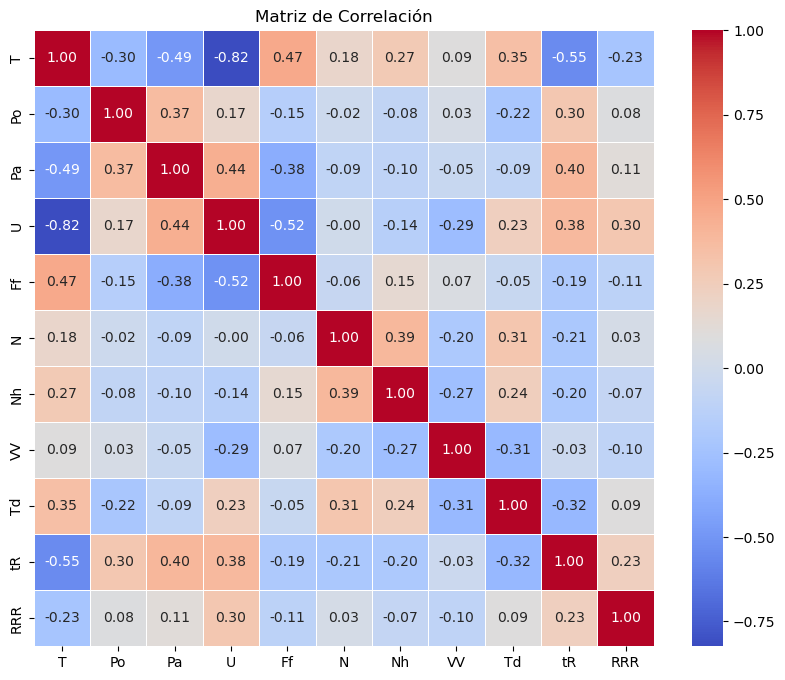

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculo de la matriz de correlación
correlation_matrix = datos.corr()

# Creación de un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")

plt.show()

In [120]:
comp = pd.DataFrame({'Real': y_test,'Predicho': y_pred})
comp.head(20)

,Real,Predicho
309,0,0
1042,0,0
381,1,1
497,0,1
551,0,1
833,0,1
96,0,1
289,1,1
950,0,1
101,0,1


In [127]:
import numpy as np

# Valores reales y predichos en dos listas o arreglos:
y_real = [10, 20, 30, 40, 50]
y_pred = [12, 18, 32, 37, 48]

# Calculo de el Error Absoluto Medio (MAE)
mae = np.mean(np.abs(np.array(y_real) - np.array(y_pred)))

# Calculo de el porcentaje de error en relación con el rango de los valores reales
range_real = np.max(y_real) - np.min(y_real)
percentage_error = (mae / range_real) * 100

print(f"MAE: {mae}")
print(f"Porcentaje de Error: {percentage_error}%")


MAE: 2.2
Porcentaje de Error: 5.500000000000001%
